### Support Vector Machine(SVM)

**The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.**

<img src='images/svm.PNG' width='60%' height='60%' />

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin..

The margin is defined as the distance between the separating hyperplane(decision boundary) and the training samples that are closest to this hyperplane, which are called support vectors.

<img src='images/svm_sv.jpg' width='90%' height='90%'/>

### Why margin should be maximum..?

**The reason  behind having decision boundaries with large margin is that they tend to have a lower generalization error i.e lower error on testing data  whereas models with small margins are more prone to overfitting..**

**Lets say we have two different hyperplane, which one we shoud choose..?**

<img src='images/svm3.PNG' width='60%' height='60%'/>

**The second line** would be a better classifier because it is as far away as possible from both the clusters(classess) while getting the training data separation right. By being right in the middle of the two clusters, it will generalizes well on test data.

<img src='images/svm5.PNG' width='80%' height='80%'/>

**We looked at the easy case of perfectly linearly separable data in the last section.** 

**Real-world data is, however, typically messy. We will almost always have a few instances that a linear classifier can’t get right.**


Here’s an example of such data:
    
<img src='images/svm_1.png' width='40%' height='40%' />

### So.. how to deal with such kind of data..?

**SVM provides a parameter called 'C' to our Linear SVM classifier**

We can then use the parameter C to control the width of the margin and therefore tune the bias-variance trade-off as shown in the picture below

<img src='images/C1.png' width='60%' height='60%' />

### C is a regularization parameter

For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.


a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies some points

<img src='images/C_para.PNG' width='60%' height='60%'/>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

### Generate samples

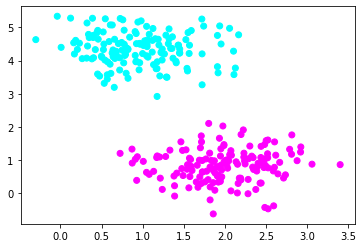

In [3]:
x1, y1 = make_blobs(n_samples=300, centers=2, random_state=0, cluster_std=0.5)
plt.scatter(x1[:,0], x1[:,1], c=y1, cmap='cool')
plt.show()

In [ ]:
# - linear 
# - rbf
# - sigmoid

In [4]:
from sklearn.svm import SVC

In [5]:
clf = SVC(kernel='linear')
clf.fit(x1, y1)

SVC(kernel='linear')

In [6]:
intercept = clf.intercept_[0]
intercept

2.4484259715429046

In [7]:
w = clf.coef_[0]
w

array([ 0.75858518, -1.45492686])

### Draw classification line

In [8]:
a = -w[0]/w[1]
X1 = np.linspace(-1,3.5, 50)
x2 = a * X1 + (-intercept/w[1])

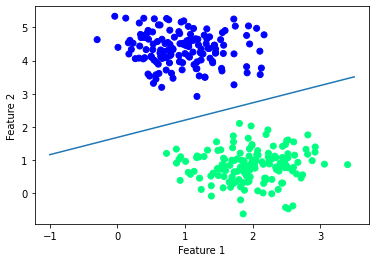

In [9]:
plt.plot(X1, x2)
plt.scatter(x1[:,0], x1[:,1], c=y1, cmap='winter')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [12]:
x1[:2]

array([[2.16784247, 4.77602707],
       [2.4931839 , 0.84010993]])

### Now add an outlier

In [13]:
# x1
x2_new = np.append(x1, [[3.2,2.5], [0,2.8]], axis=0)
y2 = np.append(y1, [0,1])

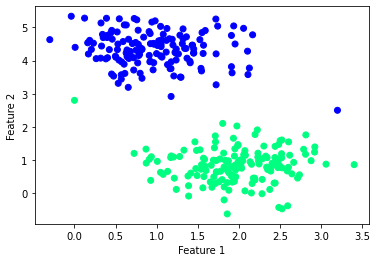

In [14]:
# plt.plot(X1, x2)
plt.scatter(x2_new[:,0], x2_new[:,1], c=y2, cmap='winter')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [21]:
clf1 = SVC(kernel='linear', C=1)
clf1.fit(x2_new, y2)

SVC(C=1, kernel='linear')

In [22]:
w = clf1.coef_[0]
intercept = clf1.intercept_[0]
a = -w[0]/w[1]
x1_out = np.linspace(-1,3.5, 50)
x2_out = a * x1_out + (-intercept/w[1])

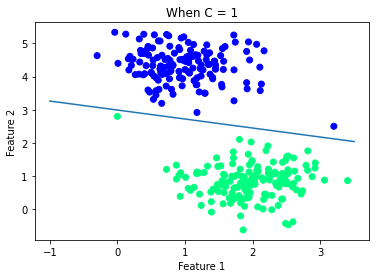

In [23]:
plt.plot(x1_out, x2_out)
plt.scatter(x2_new[:,0], x2_new[:,1], c=y2, cmap='winter')
plt.title("When C = {}".format(1))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Compare with and without outlier

Text(0, 0.5, 'Feature 2')

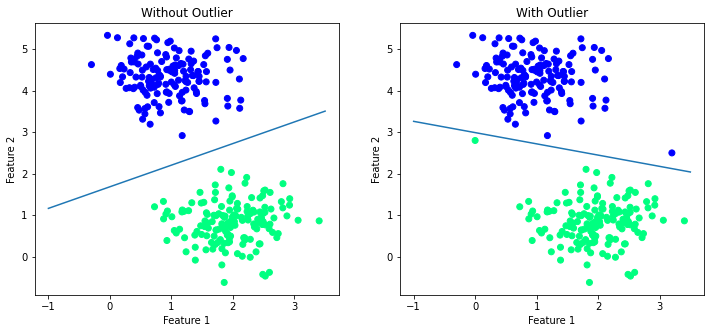

In [24]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(X1, x2)
plt.scatter(x1[:,0], x1[:,1], c=y1, cmap='winter')
plt.title("Without Outlier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1,2,2)
plt.plot(x1_out, x2_out)
plt.scatter(x2_new[:,0], x2_new[:,1], c=y2, cmap='winter')
plt.title("With Outlier")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
